## 4.4 模型选择、欠拟合和过拟合
作为机器学习科学家，我们的目标是发现模型(pattern)。但是，我们如何才能确定模型是真正发现了一种泛化的模式，而不是简单地记住了数据呢？我们希望将来部署该模型时，模型需要判断从未见过的数据。只有当模型真正发现了一种泛化模式时，才会作为有效的预测。

我们的目标是发现某些模式，这些模式捕捉到了我们训练集潜在总体到规律。如果成功做到了这点，即使是对以前从未遇到过的个体，模型也可以成功地评估风险。如何发现可以泛化的模型是机器学习的根本问题。

困难在于，当我们训练模型时，我们只能访问数据中的小部分样本。最大的公开图像数据集包含大部分大约一百万张图像。而在大部分时候，我们只能从数千或数万个数据样本中学习。将模型在训练数据上拟合的比潜在分布中更接近的现象称为过拟合(overfitting)，用于对抗过拟合的技术称为正则化(regularization)。

### 4.4.1 训练误差和泛化误差
训练误差(training error)是指，模型在训练数据集上计算得到的误差。泛化误差(generalization error)是指，模型应用在同样从原始样本的分布中抽取的无限多数数据样本时，模型误差的期望。

问题是，我们永远不能准确地计算出泛化误差。这是因为无限多的数据样本是一个虚构的对象。在实际中，我们只能通过将模型应用于一个独立的测试集来估计泛化误差，该测试集由随机选取的、未曾在训练集中出现的数据样本构成。

**统计学习理论**

由于泛化是机器学习的基本问题，许多数学家和理论家毕生致力于描述这一现象的形式理论。在同名定理(eponymous theorem)中，格里文科和坎特利推导出了训练误差收敛到泛化误差的速率。在一系列开创性的论文中，Vapnik和Chervonenkis将这一理论扩展到更一般种类的函数。这项工作为统计学习理论奠定了基础。

在我们目前已探讨、并将在之后鸡血探讨的监督学习情景中，我们假设训练数据和测试数据都是从相同的分布中独立提取的。这通常被称为独立同分布假设(i.i.d assumption)，这意味着对数据进行采样的过程没有进行“记忆”。

当我们训练模型时，我们试图找到一个能够尽可能拟合训练数据的函数。但是如果它执行地“太好了”，而不能对看不见的数据做到很好泛化，就会导致过拟合。

**模型复杂性**

当我们有简单的模型和大量的数据时，我们期望泛化误差与训练误差相近。当我们有更复杂的模型和更少的样本时，我们预计训练误差会下降，但泛化误差会增大。模型复杂性由什么构成是一个复杂的问题。一个模型是否能很好地泛化取决于很多因素。例如，具有更多参数的模型可能被认为更复杂，参数有更大取值范围的模型可能更为复杂。通常对于神经网络，我们认为需要更多训练迭代的模型比较复杂，而需要“早停”(early stopping)的模型(即较少训练迭代周期)就不那么复杂。

我们很难比较本质上不同大类的模型之间(如，决策树与神经网络)的复杂性。就目前而言，一条简单的经验法则相当有用：统计学家认为，能够轻松解释任意事实的模型是复杂的，而表达能力有限但仍能很好地解释数据的模型可能更有现实用途。在哲学上，这与波普尔的科学理论的可证伪性标准密切相关：如果一个理论能拟合数据，且有具体的测试集可以用来证明它是错误的，那么它就是好的。

影响模型泛化的因素：
- 1.可调整参数的数量。当可调整参数的数量很大时，模型往往更容易过拟合
- 2.参数采用的值。当权重的取值范围较大时，模式可能更容易过拟合
- 3.训练样本的数量。即使你的模型很简单，也很容易过拟合只包含一两个样本的数据集。而过拟合一个有数百万样本的数据集则需要一个极其灵活的模型

### 4.4.2 模型选择
在机器学习中，我们通常在评估几个候选模型后选择最终的模型。这个过程叫做模型选择。有时，需要进行比较的模型在本质上是完全不同的。又有时，我们需要比较不同的超参数设置下的同一类型。


**验证集**

通常我们会将数据分成三份：训练集、测试集、验证集(validation dataset)。但现实是验证集和测试集之间的边界较为模糊。

**K折交叉验证**

当训练数据稀缺时，我们甚至可能无法提供足够的数据来构成一个合适的验证集。这个问题的一个流行的解决方案是采用K折交叉验证。这里，原始训练数据被分成K个不重叠的子集。然后执行K次模型训练和验证，每次在K-1个子集上训练，并在剩余的一个子集上验证。最后，通过对K次实验的结果取平均来估计训练和验证误差。

### 4.4.3 欠拟合还是过拟合？
当我们比较训练和验证误差时，首先，我们需要要注意：训练误差和验证误差都很严重，但它们仅有一点差距时。如果模型不能降低训练误差，这可能意味着模型过于简单(即表达能力不足)，无法捕获试图学习的模式。此外，由于我们的训练和验证误差之间的泛化误差很小，我们有理由相信可以用一个更复杂的模型降低训练误差。这种现象称为欠拟合(underfitting)。

另一方面，当我们的训练误差明显低于验证误差时要小心，这表明严重的过拟合(overfitting)。注意，过拟合并不总是一件坏事。特别是在深度学习领域，最好的预测模型在训练数据上的表现往往比在保留数据上好的很多。最终，我们只关心验证误差，而不是训练误差和验证误差之间的差距。

**模型复杂性**

为了说明一些关于过拟合和模型复杂性的经典直觉，我们给出一个多项式的例子。给定由单个特征$x$和对应实数标签$y$组成的训练数据，我们试图找到下面的$d$阶多项式来估计标签$y$。
$$
\hat y = \sum_{i=0}^d x^i w_i
$$

这只是一个线性回归问题，我们的特征是$x$的幂给出的，模型的权重是$w_i$给出的，偏置是$w_0$给出的(因为对于所有的$x$都有$x^0 = 1$)。我们使用平方误差作为我们的损失函数。

高阶多项式函数比的低阶多项式函数复杂的多。高阶多项式参数比较多，模型函数的选择范围较广。因此在固定训练数据集的情况下，高阶多项式函数相对于低阶多项式的训练误差应该始终更低。事实上，当数据样本包含了$x$的不同值时，函数阶数等于数据样本数量的多项式函数可以完美拟合训练集。下图为多项式的阶数和欠拟合与过拟合之间的关系。

<div align=center>
<img src='../../pics/4_4_1.jpeg' width='50%'>
</div>

**数据集大小**

另一个重要因素是数据集的大小。训练数据集的样本越少，我们就越有可能过拟合。随着训练数据量大增加，泛化误差通常会减小。此外，更多的数据不会有什么坏处。对于固定的任务和数据分布，模型复杂性和数据集大小之间通常存在关系。给出更多的数据，我们可能会尝试拟合一个更复杂的模型。

### 4.4.4 多项式回归

In [1]:
import torch
import numpy as np
import math
from torch import nn
from d2l import torch as d2l

**生成数据集**

给定$x$，我们将使用以下三阶多项式来生成训练和测试数据的标签：
$$
y = 5 + 1.2 x - 3.4 \frac{x^2}{2!} + 5.6 \frac{x^3}{3!} + \epsilon where \epsilon \sim \mathcal N (0, 0.1^2)
$$

噪声项$\epsilon$服从均值为0且标准差为0.1的正态分布。在优化的过程中，我们通常希望避免非常大的梯度值或损失值。这就是我们将特征从$x^i$调整为$\frac{x^i}{i!}$的原因，这样就可以避免很大的$i$带来特别大的指数值。我们将为训练集和测试集各生成100个样本

In [2]:
max_degree = 20 #多项式的最大阶数
n_train, n_test = 100, 100
true_w = np.zeros(max_degree)
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)
ploy_features = np.power(features, np.arange(max_degree).reshape(1, -1))
for i in range(max_degree):
    ploy_features[:, i] /= math.gamma(i + 1) # gamma(a) = (n-1)!

    
labels = np.dot(ploy_features, true_w)
labels += np.random.normal(scale=0.1, size=labels.shape)

同样，存储在`ploy_features`中的单项式由`gamma`函数重新缩放，其中$\Gamma(n) = (n-1)!$。从生成的数据集中查看一下前2个样本，第一个值是与偏置相对应的常量特征。

In [3]:
true_w, features, ploy_features, labels = [torch.tensor(x, dtype=torch.float32) 
        for x in [true_w, features, ploy_features, labels]]

In [4]:
features[:2], ploy_features[:2, :], labels[:2]

(tensor([[0.6120],
         [3.7247]]),
 tensor([[1.0000e+00, 6.1203e-01, 1.8729e-01, 3.8209e-02, 5.8463e-03, 7.1563e-04,
          7.2998e-05, 6.3824e-06, 4.8828e-07, 3.3205e-08, 2.0322e-09, 1.1307e-10,
          5.7670e-12, 2.7150e-13, 1.1869e-14, 4.8429e-16, 1.8525e-17, 6.6694e-19,
          2.2677e-20, 7.3047e-22],
         [1.0000e+00, 3.7247e+00, 6.9367e+00, 8.6123e+00, 8.0195e+00, 5.9741e+00,
          3.7086e+00, 1.9733e+00, 9.1876e-01, 3.8023e-01, 1.4162e-01, 4.7955e-02,
          1.4885e-02, 4.2647e-03, 1.1346e-03, 2.8174e-04, 6.5588e-05, 1.4370e-05,
          2.9736e-06, 5.8293e-07]]),
 tensor([ 5.2512, 34.0646]))

**对模型进行训练和测试**

首先我们实现一个函数来评估模型在给定数据集上的损失

In [5]:
def evalutate_loss(net, data_iter, loss): #@save
    metric = d2l.Accumulator(2) #损失的总和，样本数量
    for X, y in data_iter:
        out = net(X)
        y = y.reshape(out.shape)
        l = loss(out, y)
        metric.add(l.sum(), l.numel())
    return metric[0]/metric[1]

In [6]:
def train(train_features, test_features, train_labels, test_labels, num_epochs=400):
    loss = nn.MSELoss()
    input_shape = train_features.shape[-1]
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1, 1)),
                    batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1, 1)), batch_size, is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log', xlim=[1, num_epochs], 
                ylim=[1e-3, 1e2], legend=['train', 'test'])

    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evalutate_loss(net, train_iter, loss),
                                evalutate_loss(net, test_iter, loss)))

    print('weight:', net[0].weight.data.numpy())

**三阶多项式函数拟合**

我们将使用三阶多项式函数，它与数据生成函数的阶数相同。结果表明，该模型能有效降低训练损失和测试损失。学习到的模型参数也接近真实值$w=[5, 1.2, -3.4, 5.6]$

weight: [[ 4.993202   1.2054404 -3.404329   5.598208 ]]


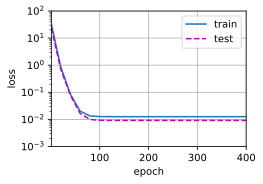

In [7]:
train(ploy_features[:n_train, :4], ploy_features[n_train:, :4], 
    labels[:n_train], labels[n_train:])

**线性函数拟合(欠拟合)**

让我们再看看线性函数拟合，减少该模型的训练损失相对困难。在最后一个迭代周期完成后，训练巡视仍然很高。当用来拟合非线性模型时，线性模型容易欠拟合

weight: [[3.3297734 5.180791 ]]


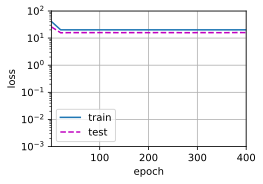

In [8]:
#从多项式特征中选择前2个维度，即1和x
train(ploy_features[:n_train, :2], ploy_features[n_train:, :2], labels[:n_train], labels[n_train:])

**高阶多项式函数拟合(过拟合)**
现在，让我们尝试使用一个阶数过高的多项式来训练模型。在这种情况下，没有足够的数据用于到高阶系数应该具有接近零到值。

weight: [[ 4.9821014   1.2657324  -3.3368638   5.338206   -0.10731512  0.56820804
  -0.08423579 -0.14082314 -0.25636962 -0.27614915 -0.18478853  0.0333471
  -0.18077014 -0.07412107  0.03698581  0.07263693 -0.13585654 -0.08333401
  -0.01407528  0.13242738]]


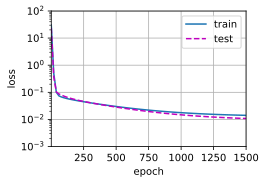

In [9]:
train(ploy_features[:n_train, :], ploy_features[n_train:, :], labels[:n_train], labels[n_train:], num_epochs=1500)

### 4.4.5 小结
- 欠拟合指模型无法继续减少训练误差。过拟合是指训练误差远小于验证误差
- 由于不能基于训练误差来估计泛化误差，因此简单地最小化训练误差并不一定意味着泛化误差的减小。机器学习模型需要注意防止过拟合，即防止泛化误差过大
- 验证集可以用于模型选择，但不能随意地使用它
- 我们应该选择一个复杂度适中的模型，避免使用数量不足的训练样本